<a href="https://colab.research.google.com/github/elichen/rl-snake/blob/main/RL_snake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q pygame

Final Score: 4


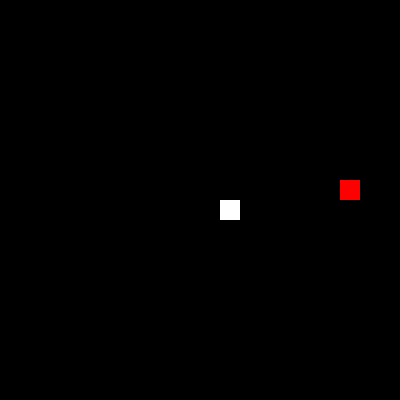

In [51]:
import pygame
import random
import numpy as np
import imageio
import io
from IPython.display import Image, display

class SnakeGame:
    def __init__(self, width, height, grid_size):
        self.width = width
        self.height = height
        self.grid_size = grid_size
        self.grid_width = width // grid_size
        self.grid_height = height // grid_size
        self.snake_speed = 10
        self.black = (0, 0, 0)
        self.white = (255, 255, 255)
        self.red = (255, 0, 0)
        self.window = None
        self.clock = None
        self.reset()

    def reset(self):
        self.snake_x = self.grid_width // 2
        self.snake_y = self.grid_height // 2
        self.snake_dx = 0
        self.snake_dy = 0
        self.snake_body = [(self.snake_x, self.snake_y)]
        self.food_x = random.randint(0, self.grid_width - 1)
        self.food_y = random.randint(0, self.grid_height - 1)
        self.score = 0
        self.frames = []
        self.game_over = False

    def is_food_overlapping_snake(self, food_x, food_y, snake_body):
        return (food_x, food_y) in snake_body

    def play_step(self, action):
        # Move the snake
        self.snake_dx, self.snake_dy = action
        self.snake_x += self.snake_dx
        self.snake_y += self.snake_dy
        self.snake_body.append((self.snake_x, self.snake_y))

        # Check for collision with the food
        if self.snake_x == self.food_x and self.snake_y == self.food_y:
            self.score += 1
            while True:
                self.food_x = random.randint(0, self.grid_width - 1)
                self.food_y = random.randint(0, self.grid_height - 1)
                if not self.is_food_overlapping_snake(self.food_x, self.food_y, self.snake_body):
                    break
        else:
            self.snake_body.pop(0)

        # Check for collision with the boundaries
        if self.snake_x < 0 or self.snake_x >= self.grid_width or self.snake_y < 0 or self.snake_y >= self.grid_height:
            self.game_over = True
            return self.game_over, self.score

        # Check for collision with itself
        if len(self.snake_body) > 1 and (self.snake_x, self.snake_y) in self.snake_body[:-1]:
            self.game_over = True
            return self.game_over, self.score

        # Clear the window
        self.window.fill(self.black)

        # Draw the snake
        for body_part in self.snake_body:
            pygame.draw.rect(self.window, self.white, [body_part[0] * self.grid_size, body_part[1] * self.grid_size, self.grid_size, self.grid_size])

        # Draw the food
        pygame.draw.rect(self.window, self.red, [self.food_x * self.grid_size, self.food_y * self.grid_size, self.grid_size, self.grid_size])

        # Update the display
        pygame.display.update()

        # Capture the frame as an image
        frame = pygame.surfarray.array3d(pygame.display.get_surface())
        frame = np.swapaxes(frame, 0, 1)
        self.frames.append(frame)

        self.clock.tick(self.snake_speed)
        return self.game_over, self.score

    def save_gif(self):
        gif_data = io.BytesIO()
        writer = imageio.get_writer(gif_data, format='GIF', duration=1/self.snake_speed)
        for frame in self.frames:
            writer.append_data(frame)
        writer.close()
        gif_data.seek(0)
        return gif_data

class HeuristicController:
    def __init__(self):
        pass

    def get_action(self, game_state):
        snake_x, snake_y, food_x, food_y = game_state
        if abs(snake_x - food_x) > abs(snake_y - food_y):
            if snake_x > food_x:
                return -1, 0
            else:
                return 1, 0
        else:
            if snake_y > food_y:
                return 0, -1
            else:
                return 0, 1

# Usage
game = SnakeGame(width=400, height=400, grid_size=20)
controller = HeuristicController()

pygame.init()
game.window = pygame.display.set_mode((game.width, game.height))
pygame.display.set_caption("Snake Game")
game.clock = pygame.time.Clock()

game.reset()
while not game.game_over:
    game_state = (game.snake_x, game.snake_y, game.food_x, game.food_y)
    action = controller.get_action(game_state)
    game_over, score = game.play_step(action)
print(f"Final Score: {score}")

pygame.quit()

gif_data = game.save_gif()
display(Image(data=gif_data.getvalue(), format='gif'))